In [35]:
import random as R
import math
import numpy as np
from dataclasses import dataclass
from matplotlib import pyplot as plt

<h3> Euclidean Classifier Development </h3>

In [36]:
Yuan_data=np.array([
    [62.08,7.98,5.03,534.56,965.18,17.21,0.94],
    [73.72,8.40,6.37,835.25,463.29,15.49,1.06],
    [77.60,6.30,6.70,890.93,463.29,17.21,0.56],
    [77.60,6.72,5.03,534.56,463.29,13.77,0.56],
    [69.84,6.72,5.36,1113.67,965.18,8.26,1.06]
])

Xia_data=np.array([
    [96.00,4.80,6.40,3157.92,1697.28,57.60,14.40],
    [96.00,51.84,8.00,6.00,3508.80,1909.44,14.40],
    [57.60,4.80,7.20,3157.92,1909.44,43.20,14.40],
    [114.00,4.80,7.60,3333.36,1697.28,54.72,17.10],
    [90.00,9.00,7.60,2631.60,1018.37,43.20,16.20]
])

In [37]:
Yuan_data

array([[6.20800e+01, 7.98000e+00, 5.03000e+00, 5.34560e+02, 9.65180e+02,
        1.72100e+01, 9.40000e-01],
       [7.37200e+01, 8.40000e+00, 6.37000e+00, 8.35250e+02, 4.63290e+02,
        1.54900e+01, 1.06000e+00],
       [7.76000e+01, 6.30000e+00, 6.70000e+00, 8.90930e+02, 4.63290e+02,
        1.72100e+01, 5.60000e-01],
       [7.76000e+01, 6.72000e+00, 5.03000e+00, 5.34560e+02, 4.63290e+02,
        1.37700e+01, 5.60000e-01],
       [6.98400e+01, 6.72000e+00, 5.36000e+00, 1.11367e+03, 9.65180e+02,
        8.26000e+00, 1.06000e+00]])

In [38]:
R.choice([Yuan_data[:,0].max(),Yuan_data[:,0].min()])+(Yuan_data[:,0].mean()/(Yuan_data[:,0].max()-Yuan_data[:,0].min()))*R.choice([0.01,0.001])

77.64649999999999

<h3> Part I: Synthetic data Generation </h3>

In [39]:
@dataclass
class Yuan:
    SampleNumber:int
    Length:float
    Bean:float
    Draft:float
    Pressure:float
    Vortex:float
    Magnetic:float
    Light:float
    Class:str

    def __init__(self):
        pass

    def generate(self):
        #generate data with two decimal places
        global Yuan_data
        self.SampleNumber=len(Yuan_data)+1
        self.Length=R.choice([Yuan_data[:,0].max(),Yuan_data[:,0].min()])+(Yuan_data[:,0].mean()/(Yuan_data[:,0].max()-Yuan_data[:,0].min()))*R.choice([0.01,0.001])
        self.Beam=R.choice([Yuan_data[:,1].max(),Yuan_data[:,1].min()])+(Yuan_data[:,1].mean()/(Yuan_data[:,1].max()-Yuan_data[:,1].min()))*R.choice([0.01,0.001])
        self.Draft=R.choice([Yuan_data[:,2].max(),Yuan_data[:,2].min()])+(Yuan_data[:,2].mean()/(Yuan_data[:,2].max()-Yuan_data[:,2].min()))*R.choice([0.01,0.001])
        self.Pressure=R.choice([Yuan_data[:,3].max(),Yuan_data[:,3].min()])+(Yuan_data[:,3].mean()/(Yuan_data[:,3].max()-Yuan_data[:,3].min()))*R.choice([0.01,0.001])
        self.Vortex=R.choice([Yuan_data[:,4].max(),Yuan_data[:,4].min()])+(Yuan_data[:,4].mean()/(Yuan_data[:,4].max()-Yuan_data[:,4].min()))*R.choice([0.01,0.001])
        self.Magnetic=R.choice([Yuan_data[:,5].max(),Yuan_data[:,5].min()])+(Yuan_data[:,5].mean()/(Yuan_data[:,5].max()-Yuan_data[:,5].min()))*R.choice([0.01,0.001])
        self.Light=R.choice([Yuan_data[:,6].max(),Yuan_data[:,6].min()])+(Yuan_data[:,6].mean()/(Yuan_data[:,6].max()-Yuan_data[:,6].min()))*R.choice([0.01,0.001])
        self.Class='YUAN'

    def toVector(self):
        return np.array([self.Length,self.Beam,self.Draft,self.Pressure,self.Vortex,self.Magnetic,self.Light])

@dataclass
class Xia:
    SampleNumber:int
    Length:float
    Bean:float
    Draft:float
    Pressure:float
    Vortex:float
    Magnetic:float
    Light:float
    Class:str

    def __init__(self):
        pass
    def generate(self):
        global Xia_data
        self.SampleNumber=len(Xia_data)+1
        self.Length=R.choice([Xia_data[:,0].max(),Xia_data[:,0].min()])+(Xia_data[:,0].mean()/(Xia_data[:,0].max()-Xia_data[:,0].min()))*R.choice([0.01,0.001])
        self.Beam=R.choice([Xia_data[:,1].max(),Xia_data[:,1].min()])+(Xia_data[:,1].mean()/(Xia_data[:,1].max()-Xia_data[:,1].min()))*R.choice([0.01,0.001])
        self.Draft=R.choice([Xia_data[:,2].max(),Xia_data[:,2].min()])+(Xia_data[:,2].mean()/(Xia_data[:,2].max()-Xia_data[:,2].min()))*R.choice([0.01,0.001])
        self.Pressure=R.choice([Xia_data[:,3].max(),Xia_data[:,3].min()])+(Xia_data[:,3].mean()/(Xia_data[:,3].max()-Xia_data[:,3].min()))*R.choice([0.01,0.001])
        self.Vortex=R.choice([Xia_data[:,4].max(),Xia_data[:,4].min()])+(Xia_data[:,4].mean()/(Xia_data[:,4].max()-Xia_data[:,4].min()))*R.choice([0.01,0.001])
        self.Magnetic=R.choice([Xia_data[:,5].max(),Xia_data[:,5].min()])+(Xia_data[:,5].mean()/(Xia_data[:,5].max()-Xia_data[:,5].min()))*R.choice([0.01,0.001])
        self.Light=R.choice([Xia_data[:,6].max(),Xia_data[:,6].min()])+(Xia_data[:,6].mean()/(Xia_data[:,6].max()-Xia_data[:,6].min()))*R.choice([0.01,0.001])
        self.Class='XIA'

    def toVector(self):
        return np.array([self.Length,self.Beam,self.Draft,self.Pressure,self.Vortex,self.Magnetic,self.Light])

In [40]:
samples_to_generae=10
for i in range(samples_to_generae):
    yuan=Yuan()
    yuan.generate()
    xia=Xia()
    xia.generate()
    Yuan_data=np.vstack((Yuan_data,yuan.toVector()))
    Xia_data=np.vstack((Xia_data,xia.toVector()))

In [41]:
#format to 2 decinmal places

Yuan_data=np.around(Yuan_data,2)
Xia_data=np.around(Xia_data,2)

In [42]:
#add class label
Yuan_data=np.hstack((Yuan_data,np.array([['YUAN']]*Yuan_data.shape[0]).reshape(-1,1)))
Xia_data=np.hstack((Xia_data,np.array([['XIA']]*Xia_data.shape[0]).reshape(-1,1)))

#add sample number
Yuan_data=np.hstack((np.array(['YSN-{}'.format(i) for i in range(1,Yuan_data.shape[0]+1)]).reshape(-1,1),Yuan_data))
Xia_data=np.hstack((np.array(['XSN-{}'.format(i) for i in range(1,Xia_data.shape[0]+1)]).reshape(-1,1),Xia_data))

In [43]:
#save to text files

np.savetxt('Yuan.txt',Yuan_data,fmt='%s',delimiter=' ')
np.savetxt('Xia.txt',Xia_data,fmt='%s',delimiter=' ')

In [44]:
#remove index and class label from the data

Yuan_data=Yuan_data[:,1:-1].astype(float)
Xia_data=Xia_data[:,1:-1].astype(float)

In [45]:
#split the data into training and testing sets in the ratio 70:30
Yuan_train=Yuan_data[:int(0.7*Yuan_data.shape[0])]
Yuan_test=Yuan_data[int(0.7*Yuan_data.shape[0]):]

Xia_train=Xia_data[:int(0.7*Xia_data.shape[0])]
Xia_test=Xia_data[int(0.7*Xia_data.shape[0]):]

In [46]:
#perform z-score normalization

Yuan_train=(Yuan_train-Yuan_train.mean(axis=0))/Yuan_train.std(axis=0)
Yuan_test=(Yuan_test-Yuan_test.mean(axis=0))/Yuan_test.std(axis=0)


Xia_train=(Xia_train-Xia_train.mean(axis=0))/Xia_train.std(axis=0)
Xia_test=(Xia_test-Xia_test.mean(axis=0))/Xia_test.std(axis=0)

In [47]:
#create the mean vector for each numeric feature

Yuan_mean_vector=Yuan_train.mean(axis=0)
Xia_mean_vector=Xia_train.mean(axis=0)

In [48]:
#calculate the square root of the sum of the squared differences between the mean vector and each sample

yuan_distances=np.sqrt(np.sum((Yuan_train-Yuan_mean_vector)**2,axis=1))
xia_distances=np.sqrt(np.sum((Xia_train-Xia_mean_vector)**2,axis=1))

In [49]:
#get minimum,maximum,range,mean,median,variance,standard deviation for each class

yuan_min=np.min(yuan_distances)
yuan_max=np.max(yuan_distances)
yuan_range=yuan_max-yuan_min
yuan_mean=np.mean(yuan_distances)
yuan_median=np.median(yuan_distances)
yuan_var=np.var(yuan_distances)
yuan_std=np.std(yuan_distances)


xia_min=np.min(xia_distances)
xia_max=np.max(xia_distances)
xia_range=xia_max-xia_min
xia_mean=np.mean(xia_distances)
xia_median=np.median(xia_distances)
xia_var=np.var(xia_distances)
xia_std=np.std(xia_distances)



#print the analysis

print('Yuan class')
print('Minimum distance: {}'.format(yuan_min))
print('Maximum distance: {}'.format(yuan_max))
print('Range: {}'.format(yuan_range))
print('Mean: {}'.format(yuan_mean))
print('Median: {}'.format(yuan_median))
print('Variance: {}'.format(yuan_var))
print('Standard deviation: {}'.format(yuan_std))

print("\n\n\n")

print('Xia class')
print('Minimum distance: {}'.format(xia_min))
print('Maximum distance: {}'.format(xia_max))
print('Range: {}'.format(xia_range))
print('Mean: {}'.format(xia_mean))
print('Median: {}'.format(xia_median))
print('Variance: {}'.format(xia_var))
print('Standard deviation: {}'.format(xia_std))


Yuan class
Minimum distance: 1.8909581137935294
Maximum distance: 3.5111799671645287
Range: 1.6202218533709993
Mean: 2.616818304568045
Median: 2.588609173814545
Variance: 0.15226196087762195
Standard deviation: 0.3902075869042297




Xia class
Minimum distance: 1.3945770399704995
Maximum distance: 3.3764408944517954
Range: 1.9818638544812959
Mean: 2.5809820586493104
Median: 2.676373715228153
Variance: 0.3385316129303689
Standard deviation: 0.5818346955367726


In [50]:
#convert the test data to float
Yuan_test=Yuan_test.astype(float)
Xia_test=Xia_test.astype(float)

Accuracy: 1.0
Error Rate: 0.0
Confusion Matrix: [[5 0]
 [0 5]]


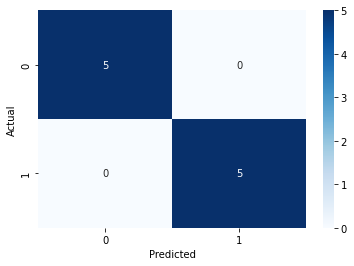

In [51]:
#normalize the test data

Yuan_test=(Yuan_test-Yuan_test.mean(axis=0))/Yuan_test.std(axis=0)
Xia_test=(Xia_test-Xia_test.mean(axis=0))/Xia_test.std(axis=0)

#euclidean distance between the each sample and the mean vector

yuan_test_distances=np.sqrt(np.sum((Yuan_test-Yuan_mean_vector)**2,axis=1))
xia_test_distances=np.sqrt(np.sum((Xia_test-Xia_mean_vector)**2,axis=1))

#add sample number to distances

yuan_test_distances=np.hstack((np.array(['YSN-{}'.format(i) for i in range(1,yuan_test_distances.shape[0]+1)]).reshape(-1,1),yuan_test_distances.reshape(-1,1)))
xia_test_distances=np.hstack((np.array(['XSN-{}'.format(i) for i in range(1,xia_test_distances.shape[0]+1)]).reshape(-1,1),xia_test_distances.reshape(-1,1)))


#classify the test data. If the distance is less than max distance of the training data, then it is classified as correct, otherwise it is classified as incorrect

Yuan_correct=0
Yuan_incorrect=0
Xia_correct=0
Xia_incorrect=0

for i in range(yuan_test_distances.shape[0]):
    if float(yuan_test_distances[i,1])<=yuan_max:
        Yuan_correct+=1
    else:
        Yuan_incorrect+=1

for i in range(xia_test_distances.shape[0]):
    if float(xia_test_distances[i,1])<=xia_max:
        Xia_correct+=1
    else:
        Xia_incorrect+=1


accuracy=(Yuan_correct+Xia_correct)/(Yuan_correct+Yuan_incorrect+Xia_correct+Xia_incorrect)
print("Accuracy: {}".format(accuracy))

#calculate error rate which is number of incorrect classifications divided by total number of classifications

error_rate=(Yuan_incorrect+Xia_incorrect)/(Yuan_correct+Yuan_incorrect+Xia_correct+Xia_incorrect)
print("Error Rate: {}".format(error_rate))

#calculate and plot confusion matrix

confusion_matrix=np.array([[Yuan_correct,Xia_incorrect],[Xia_incorrect,Xia_correct]])
print("Confusion Matrix: {}".format(confusion_matrix))


#plot confusion matrix as a heatmap
import seaborn as sns
sns.heatmap(confusion_matrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
